**<u>SQL Joins assignment</u>**

**Database Schema**

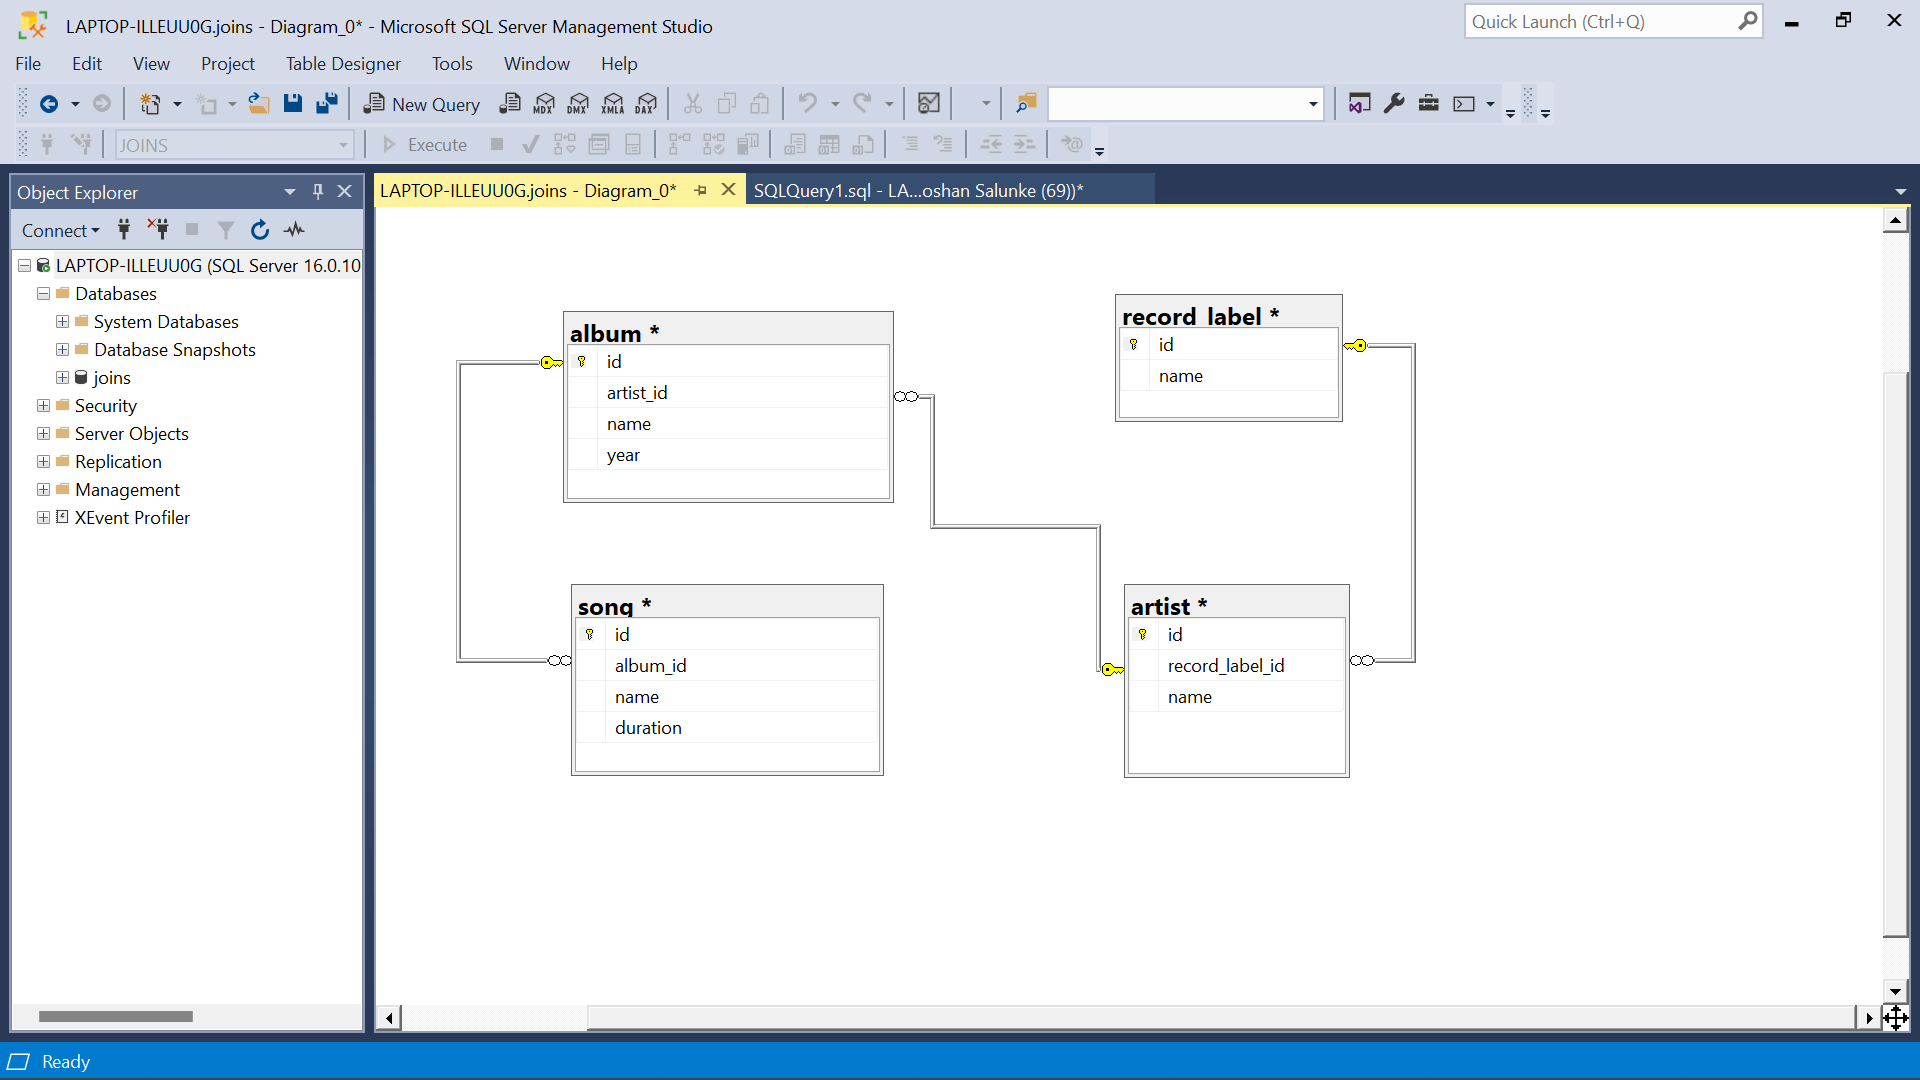

<u>Initial queries for database, table creation and inserting values</u>

Create and use database

> create database joins;

use joins;

Create Tables

CREATE table album (id int, artist_id int, name varchar(100), year int)

CREATE table song (id int, album_id int, name varchar(50), duration
float(20))

CREATE table record_label (id int, name varchar(50))

CREATE table artist (id int, record_label_id int, name varchar(50))

Inserting Values

INSERT INTO album (id, artist_id, name, year) VALUES(1, 1, 'Devils got a
new disguise', 2006),

(2,1,'Keeps getting better',2008),

(3, 1,'Master of Puppets',1986),

(4, 2,'Endgame',2009),

(5, 2,'Icon',2012),

(6,3,'Story',2000),

(7,4,'Chapters',2003),

(8,4,'Riding with the King',2000),

(9,5,'Pieces of a Dream',2005),

(10,6,'Greatest Hits',2004),

(11,7,'All-Time Greatest Hits',1975),

(12,8,'Greatest Hits',1983),(13,9,'Ultimate Collection',2015)

INSERT INTO song (id, album_id, name, duration) VALUES(1,1,'Dream
On',4.26),(2,1,'Back in the Saddle',4.40),

(3,2,'Genie in a Bottle',5.3),

(4,2,'Beautiful',5.29),

(5,3,'Master of Puppets',8.35),

(6,3,'Battery',5.13),

(7,4,'Dialectic Chaos',2.26),

(8,4,'Endgame',5.57),

(9,5,'Watching Airplanes',4.03),

(10,5,'Man to Man',3.41),

(11,6,'Balck Winter Day',3.48),

(12,6,'Against Widows',4.04),

(13,7,'Reptile',3.36),

(14,7,'Modern Girl',4.49),

(15,8,'Riding with the King',4.23),

(16,8,'Key to the Highway',3.39),

(17,9,'Im Outta Love',4.02),

(18,9,'Not That Kind',3.20),

(19,10,'Eruption',1.43),

(20,10,'Hot For Teacher',4.43),

(21,11,'Sweet Home Alabama',4.45),

(22,11,'Free Bird',14.23),

(23,12,'Thunderstruck',4.52),

(24,12,'T.N.T',3.35),

(25,13,'Sgt. Pepper''s Lonely Hearts Club Band',2.0333),

(26,13,'With a Little Help from My Friends',2.7333),

(27,13,'Lucy in the Sky with Diamonds',3.4666),

(28,13,'Getting Better',2.8),(29,13,'Fixing a Hole',2.6),

(30,13,'Shes Leaving Home',3.5833),

(31,13,'Being for the Benefit of Mr. Kite!',2.6166),

(32,13,'Within You Without You',5.066),

(33,13,'When I''m Sixty-Four',2.6166),

(34,13,'Lovely Rita',2.7),

(35,13,'Good Morning Good Morning',2.6833),

(36,13,'Sgt. Pepper''s Lonely Hearts Club Band (Reprise)',1.3166),

(37,13,'A Day in the Life',5.65)

INSERT INTO record_label (id, name) VALUES(1,'Blackened'),

(6,'Capitol'),

(5,'Elektra'),

(4,'MCA'),

(3,'Universal'),

(2,'Warner Bros')

INSERT INTO artist (id, record_label_id, name) VALUES(3,1,'Anthrax'),

(2,1,'Christina'),

(1,1,'Aerosmith'),

(4,2,'Eric Clapton'),

(6,2,'Amorphis'),

(5,2,'Gary Allan'),

(8,3,'AC/DC'),

(7,3,'Lynyrd Skynyrd'),

(9,6,'Anastacia')

<u>Assignment Questions</u>

Q1. Show all the 4 tables(album, song, record label and artist)

Output:-

select \* from album;

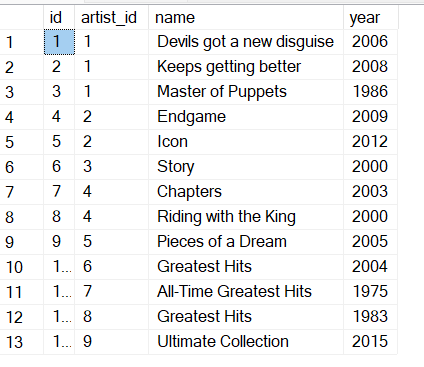

select \* from song;

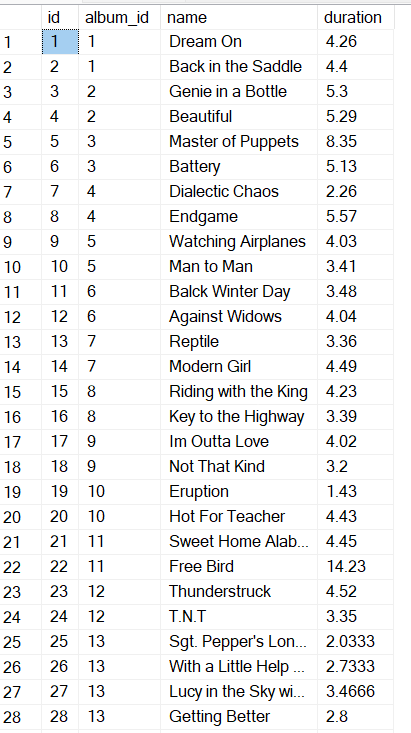

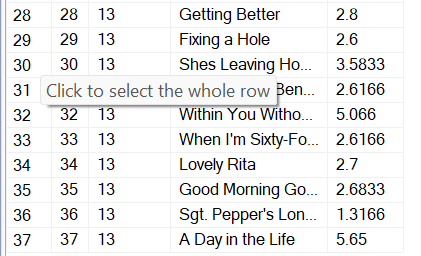

select \* from record_label;

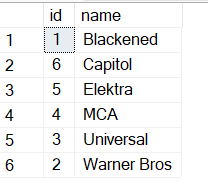

select \* from artist;

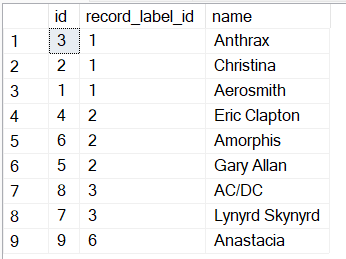

2 List all artists for each record label sorted by artist name.

select ar.name 'artist name', r.name 'record lable name' from
record_label r

join artist ar on r.id=ar.record_label_id order by ar.name;

Output:

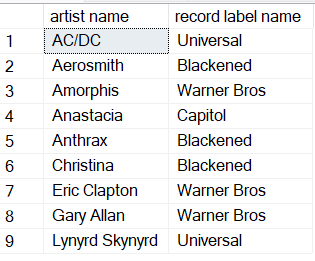

3.Which record labels have no artists?

select r.name 'record name' from record_label r

left join artist ar on r.id=ar.record_label_id

where ar.record_label_id is null;

Output:

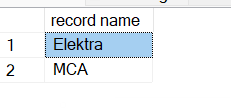

4\. List the number of songs per artist in descending order

select ar.name 'artist name',count(\*) 'number_of_song' from song s

join album al on s.album_id=al.id

join artist ar on al.artist_id=ar.id

group by ar.name

order by count(\*)desc;

Output:

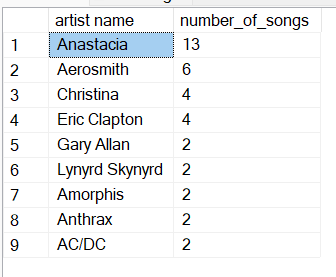

5\. Which artist or artists have recorded the most number of songs?

select top 1 ar.name 'artist name',count(\*) 'number_of_song' from song
s

join album al on s.album_id=al.id

join artist ar on al.artist_id=ar.id

group by ar.name

order by count(\*)desc;

Note: In Microsoft Server Studio use top n instead of limit

Output:

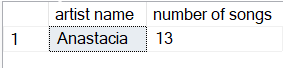

6.Which artist or artists have recorded the least number of songs?

select top 5 ar.name 'artist name' , count(\*) 'number_of_song' from
song s

join album al on s.album_id=al.id

join artist ar on al.artist_id=ar.id

group by ar.name

order by count(\*)asc;

Output:

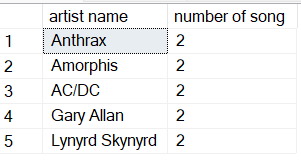

7.which artists have recorded songs longer than 5 minutes, and how many
songs was that?

select ar.name 'artist name' ,count(\*)'number_of_song' from song s

join album al on s.album_id=al.id

join artist ar on al.artist_id=ar.id

where s.duration \> 5

group by ar.name;

Output:

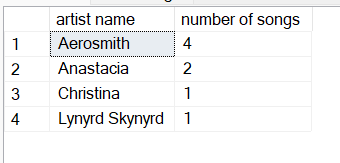

8.for each artist and album how many songs were less than 5 minutes
long?

select ar.name 'artist name' ,al.name 'album name', count(\*)
'number_of_song' from song s

join album al on s.album_id=al.id

join artist ar on al.artist_id=ar.id

where s.duration \< 5

group by ar.name,

al.name;

Output:

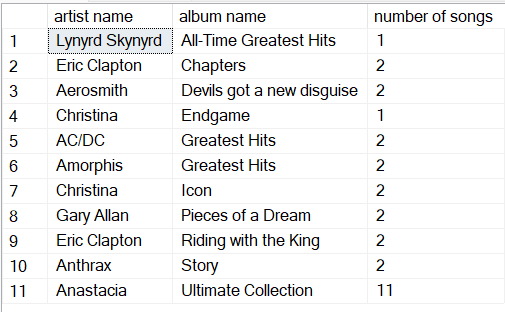

9.In which year or years were the most songs recorded?

select al.year 'year', count(\*) 'number of songs'

from song s join album al on s.album_id=al.id

join artist ar on al.artist_id=ar.id

group by al.year

having count(\*) = (

select max(count) from(select al.year,

count(\*)count

from song s join album al on s.album_id=al.id

join artist ar on al.artist_id=ar.id

group by al.year)

as temp);

Output:

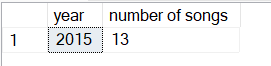

10\. list the artist, song and year of the top 5 longest recorded songs

select top 5 ar.name 'artist name' ,

al.name 'album name',

s.name 'song',

al.year 'year',

s.duration

from song s join album al on s.album_id=al.id

join artist ar on al.artist_id=ar.id

order by s.duration desc;

Output:

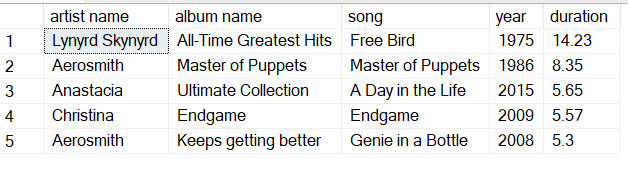

11.Number of albums recorded for each year

select al.year 'year',

count(\*) 'count of album'

from album al

group by al.year

order by al.year asc;

Output:

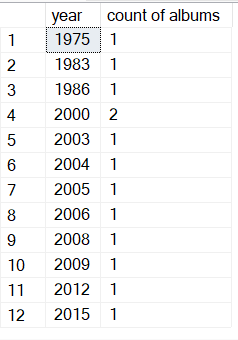

12\. What is the max number of recorded albums across all the years?

select top 1 count(\*) 'max number of album recorded per year for all
years'

from album al

group by al.year

order by count(\*)desc;

-- Hint: using the above sql as a temp table

Output:

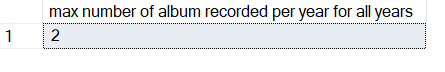

13\. In which year (or years) were the most (max) number of albums
recorded, and how many were recorded?

select top 1 count(\*) 'max number of album recorded per year for all
years'

from album al

group by al.year

order by count(\*)desc;

-- Hint: using the above sql as a sub-select

Output:

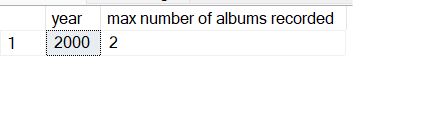

14\. total duration of all songs recorded by each artist in descending
order

select ar.name 'artist name', round(sum(s.duration),2) 'total duration
of song'

from song s join album al on s.album_id=al.id

join artist ar on al.artist_id=ar.id

group by ar.name

order by sum(s.duration)desc;

Output:

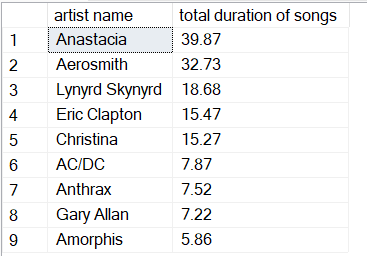

15.for which artist and album are there no songs less than 5 minutes
long?

select ar.name 'artist name',al.name 'album name'

from artist ar left join album al on ar.id=al.artist_id

left join song s on s.album_id=al.id and s.duration \< 5

where s.name is null;

Output:

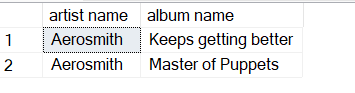

16\. Display a table of all artists, albums, songs and song duration --
all ordered in ascending order by artist, album and song

select ar.name 'artist name',al.name 'album name',

s.name 'song name',

s.duration 'duration'

from artist ar join album al on al.artist_id=ar.id

join song s on s.album_id=al.id

order by ar.name asc,al.name asc, s.name asc;

Output:

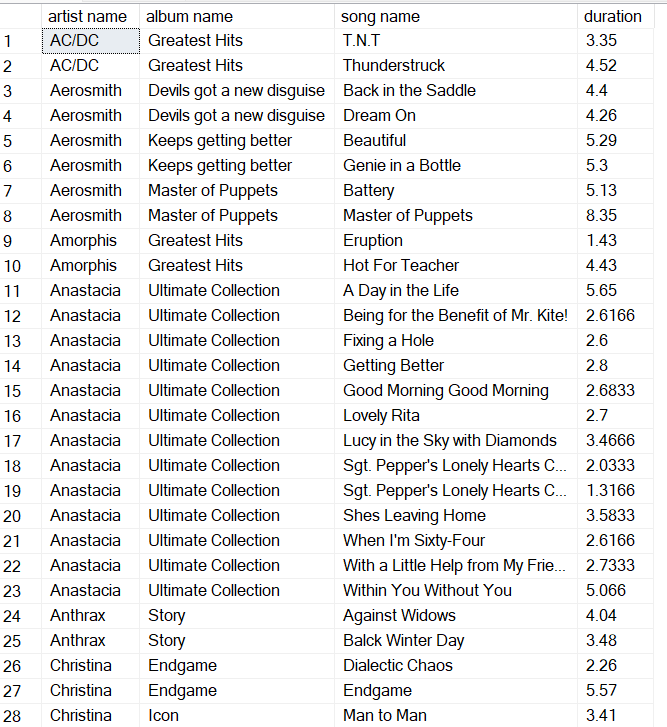

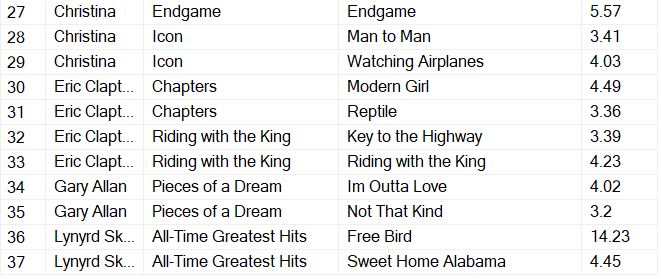

18\. Total album length for all songs on the Greatest hits album - in
minutes and seconds

select al.name 'album name',

case

when round((sum(s.duration)-cast(sum(s.duration) as int)),2)>0.60 then

cast (sum(s.duration) as int)+1

else cast(sum(s.duration)as int)

end as 'minutes',

case when round ((sum(s.duration)-cast (sum(s.duration)as int)),2)> 0.60

then (round ((sum(s.duration)-cast (sum(s.duration)as
int)),2).0.60)\*100

else (round ((sum(s.duration)-cast (sum(s.duration)as int))\*2))\*100

end as 'seconds'

from album al join song s on s.album_id=al.id

where al.name like 'Greatest%' group by al.name;

Output:

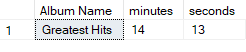

19\. Which artists did not release an album during the decades of the
1980's and the 1990's?

select distinct

ar.name 'artist name'

from artist ar left join album al on ar.id=al.artist_id and year>=1980
and year\<=1990

where year is null

order by ar.name;

Output:

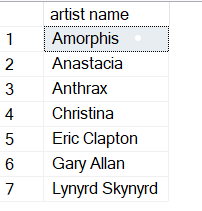

20\. Which artists did release an album during the decades of the 1980's
and the 1990's?

select distinct

ar.name 'artist name'

from artist ar left join album al on ar.id=al.artist_id and year>=1980
and year\<=1990

where year is not null;

Output:

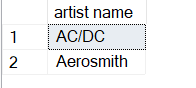